<a href="https://colab.research.google.com/github/Kyingod/Colab/blob/main/CustonTrainYolov5Roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install requirements
%pip install -qr requirements.txt
%pip install roboflow

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="TBQds0afyzdR541IXteZ")
project = rf.workspace("lobo911").project("my-first-project-jyfl6")
version = project.version(4)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-4 in yolov5pytorch:: 100%|██████████| 424/424 [00:00<00:00, 4044.32it/s]


In [ ]:
# Since you've already downloaded the dataset:
dataset_path = "/content/yolov5/My-First-Project-4"


In [ ]:
# STEP 3: Start training
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 50 \
  --data {dataset_path}/data.yaml \
  --weights yolov5s.pt \
  --name yolov5_custom


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-20 14:41:17.516983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753022477.750078    1551 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753022477.810391    1551 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

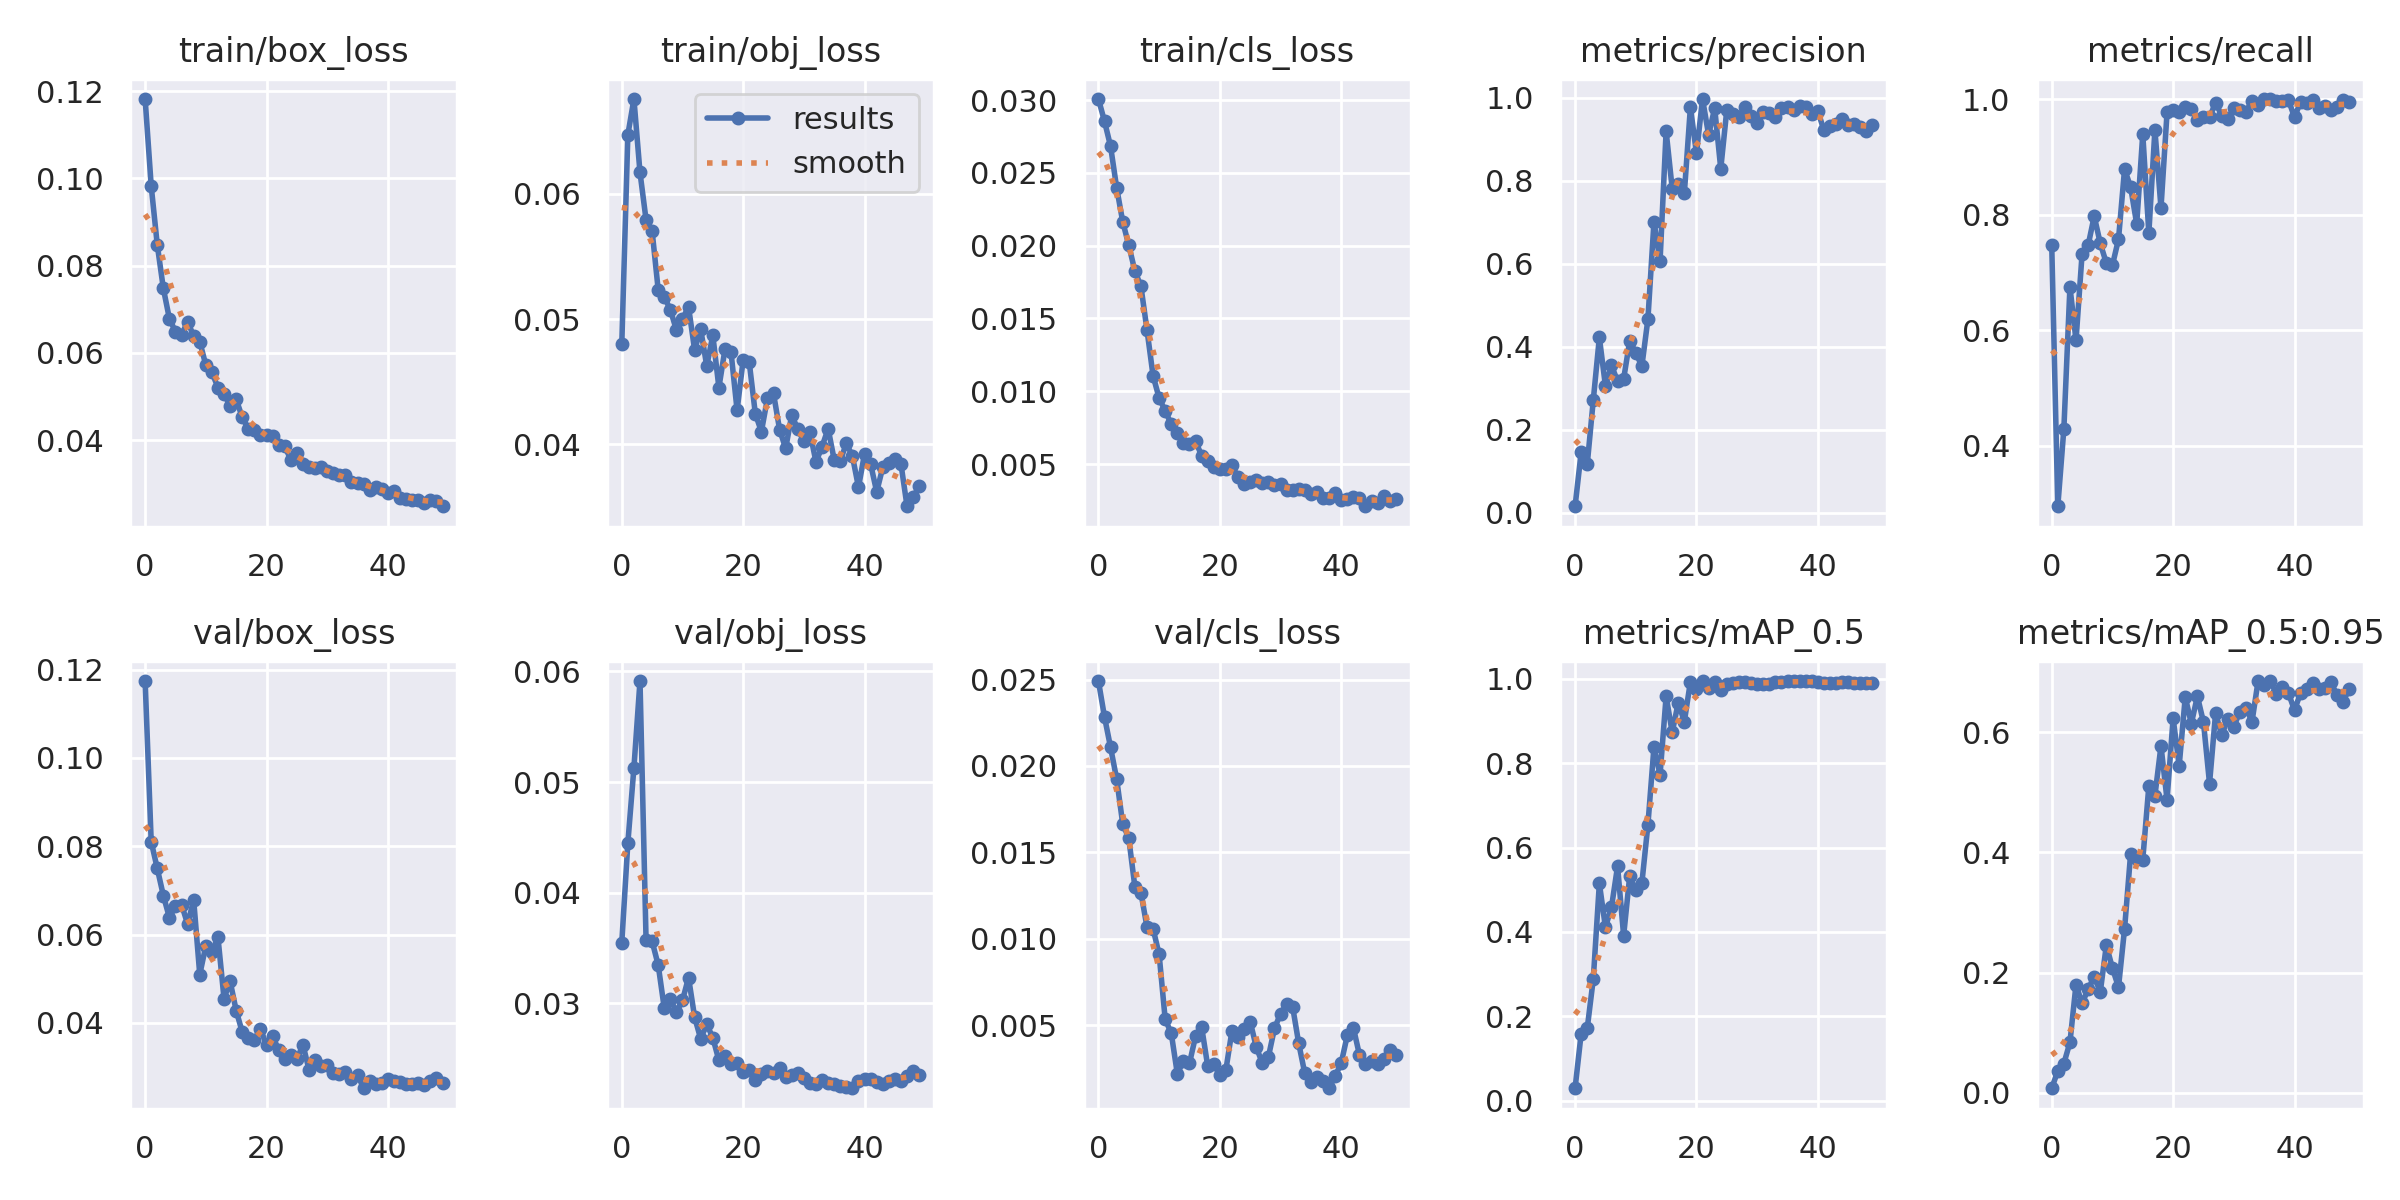

In [ ]:
# STEP 4: View training results
from IPython.display import Image
Image(filename='runs/train/yolov5_custom/results.png')

In [ ]:
# STEP 5: Run inference on test images
!python detect.py \
  --weights runs/train/yolov5_custom/weights/best.pt \
  --img 416 \
  --conf 0.25 \
  --source {dataset_path}/test/images

In [ ]:
# STEP 6: Display output images
import glob
from IPython.display import display

for img_path in glob.glob('runs/detect/exp/*.jpg'):
    display(Image(filename=img_path))

In [ ]:
import shutil
import os

# Remove any old test_images and recreate
shutil.rmtree('/content/test_images', ignore_errors=True)
os.makedirs('/content/test_images', exist_ok=True)


In [ ]:
import glob
for f in glob.glob('/content/test_images/*'):
    print(f)


/content/test_images/photo_75_2025-07-18_21-44-14.jpg
/content/test_images/photo_41_2025-07-18_21-44-14.jpg
/content/test_images/photo_28_2025-07-18_21-44-14.jpg
/content/test_images/photo_59_2025-07-18_21-44-14.jpg
/content/test_images/photo_19_2025-07-18_21-44-14.jpg


In [ ]:
!python detect.py \
  --weights runs/train/yolov5_custom/weights/best.pt \
  --img 416 \
  --conf 0.25 \
  --source /content/test_images \
  --project runs/detect \
  --name new_test \
  --exist-ok


detect: weights=['runs/train/yolov5_custom/weights/best.pt'], source=/content/test_images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=new_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/test_images/photo_19_2025-07-18_21-44-14.jpg: 416x320 2 locks, 4 watchs, 30.8ms
image 2/5 /content/test_images/photo_28_2025-07-18_21-44-14.jpg: 416x320 2 locks, 3 watchs, 6.6ms
image 3/5 /content/test_images/photo_41_2025-07-18_21-44-14.jpg: 320x416 4 watchs, 42.7ms
image 4/5 /c

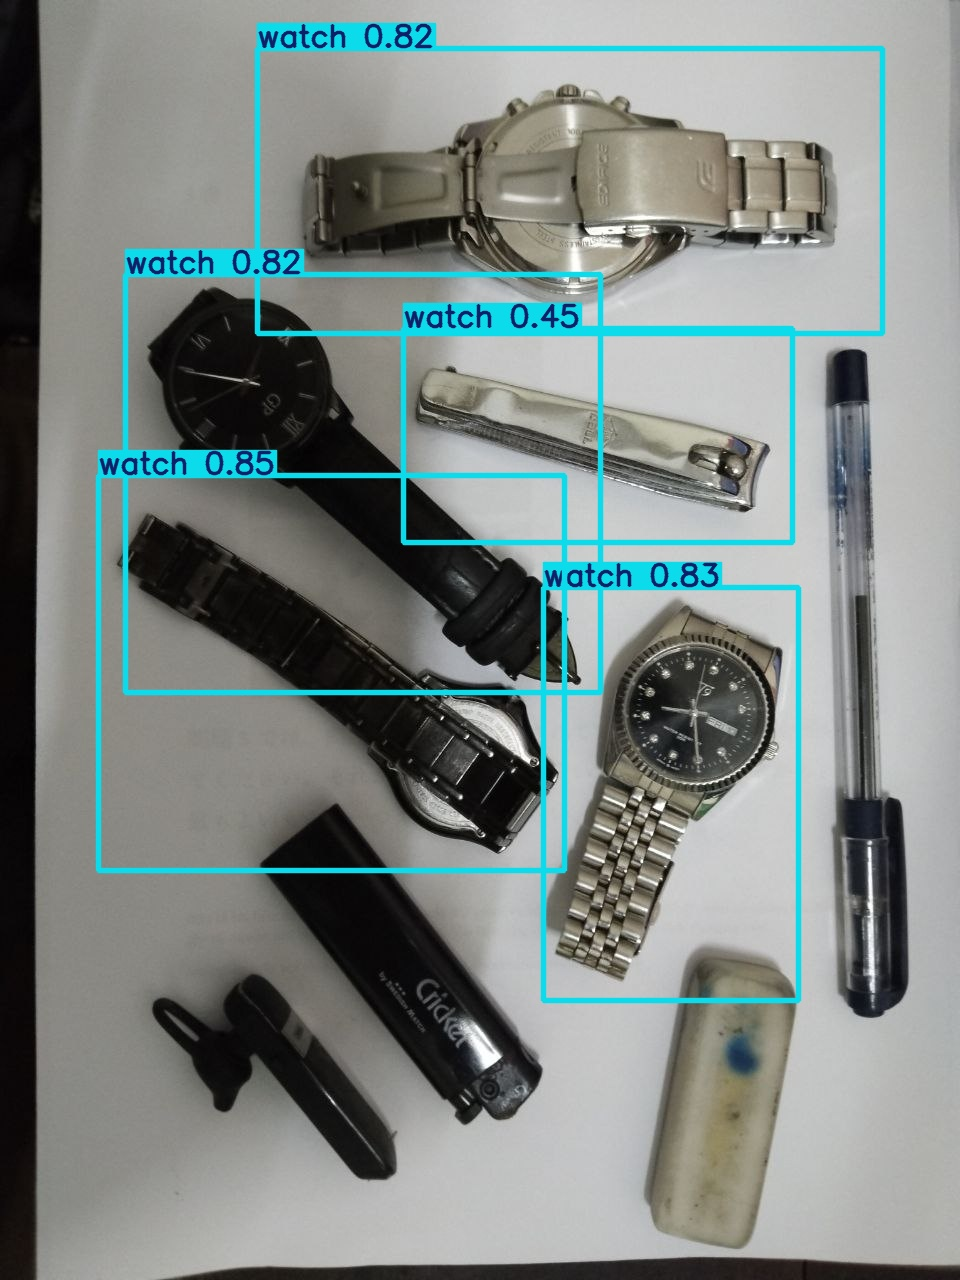

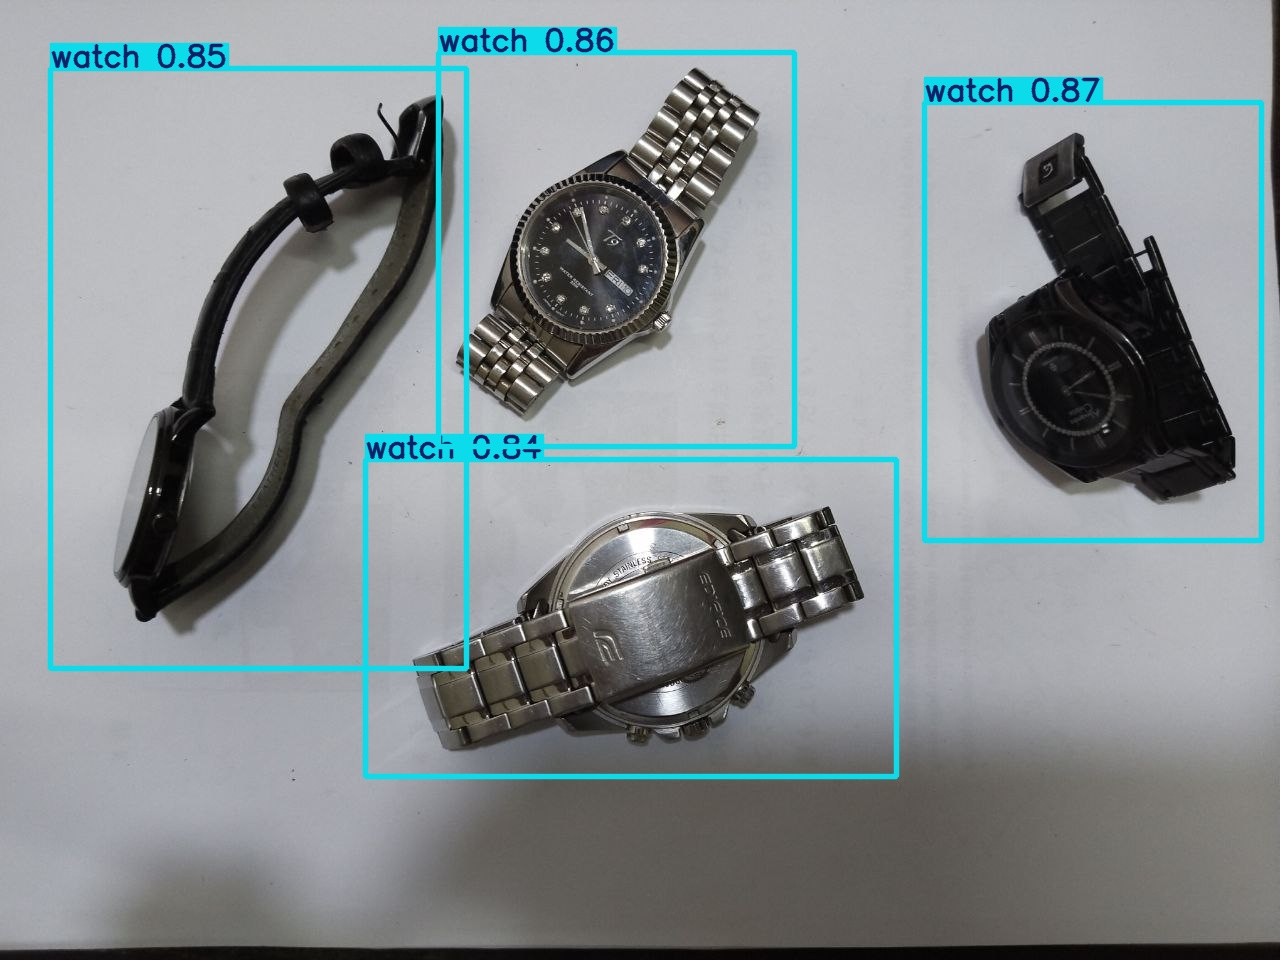

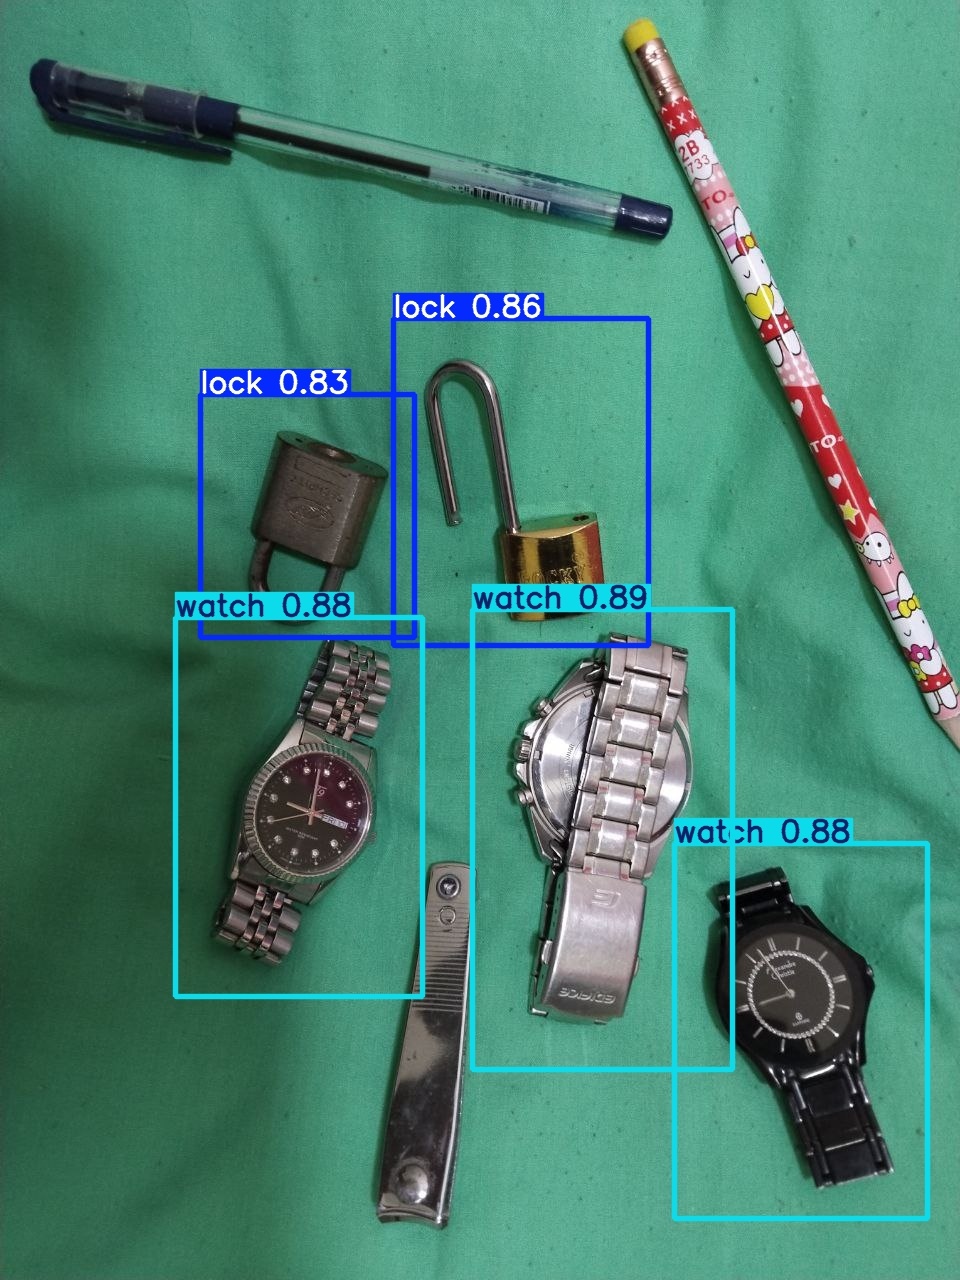

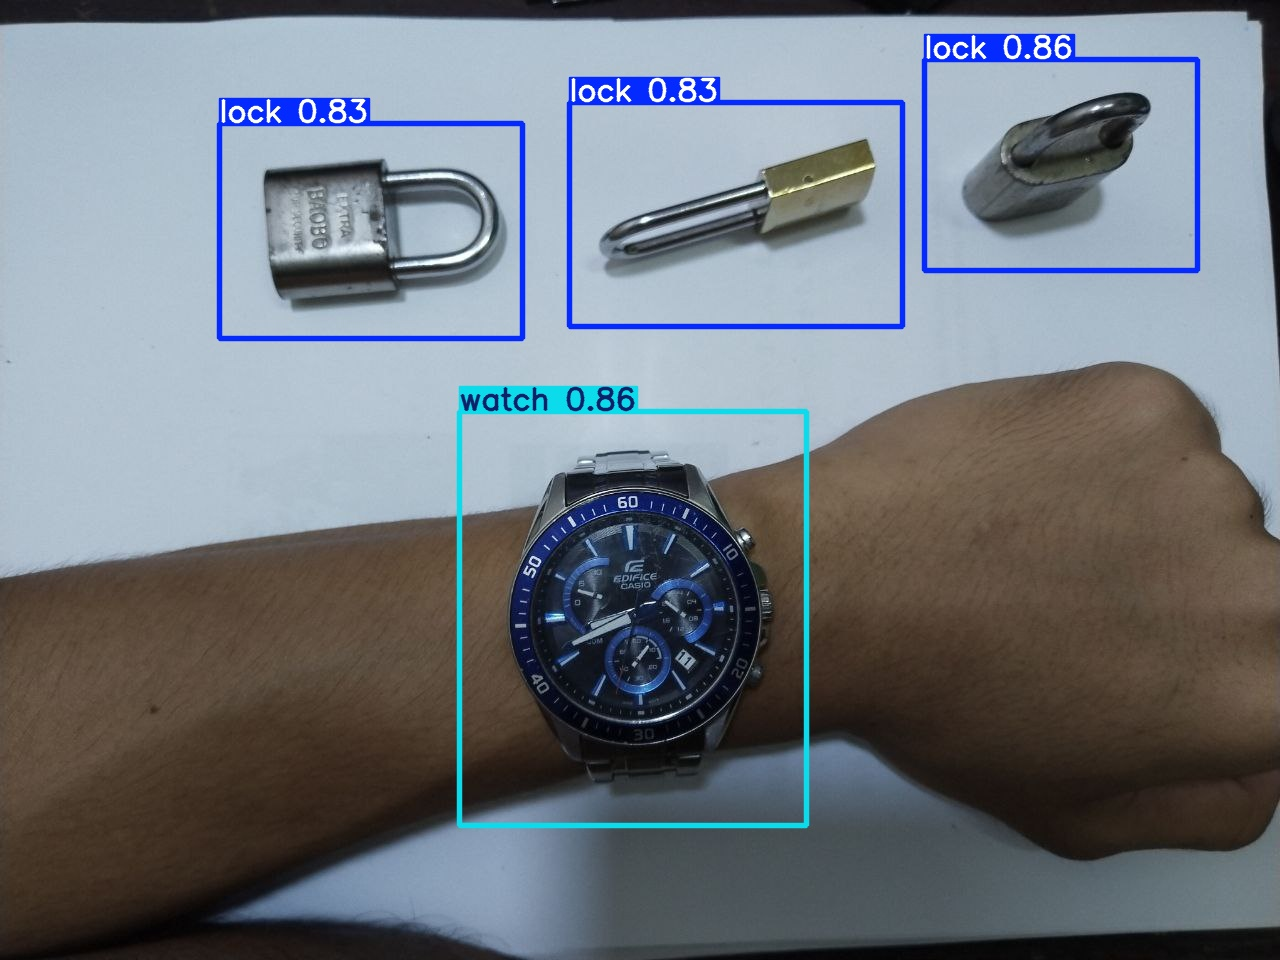

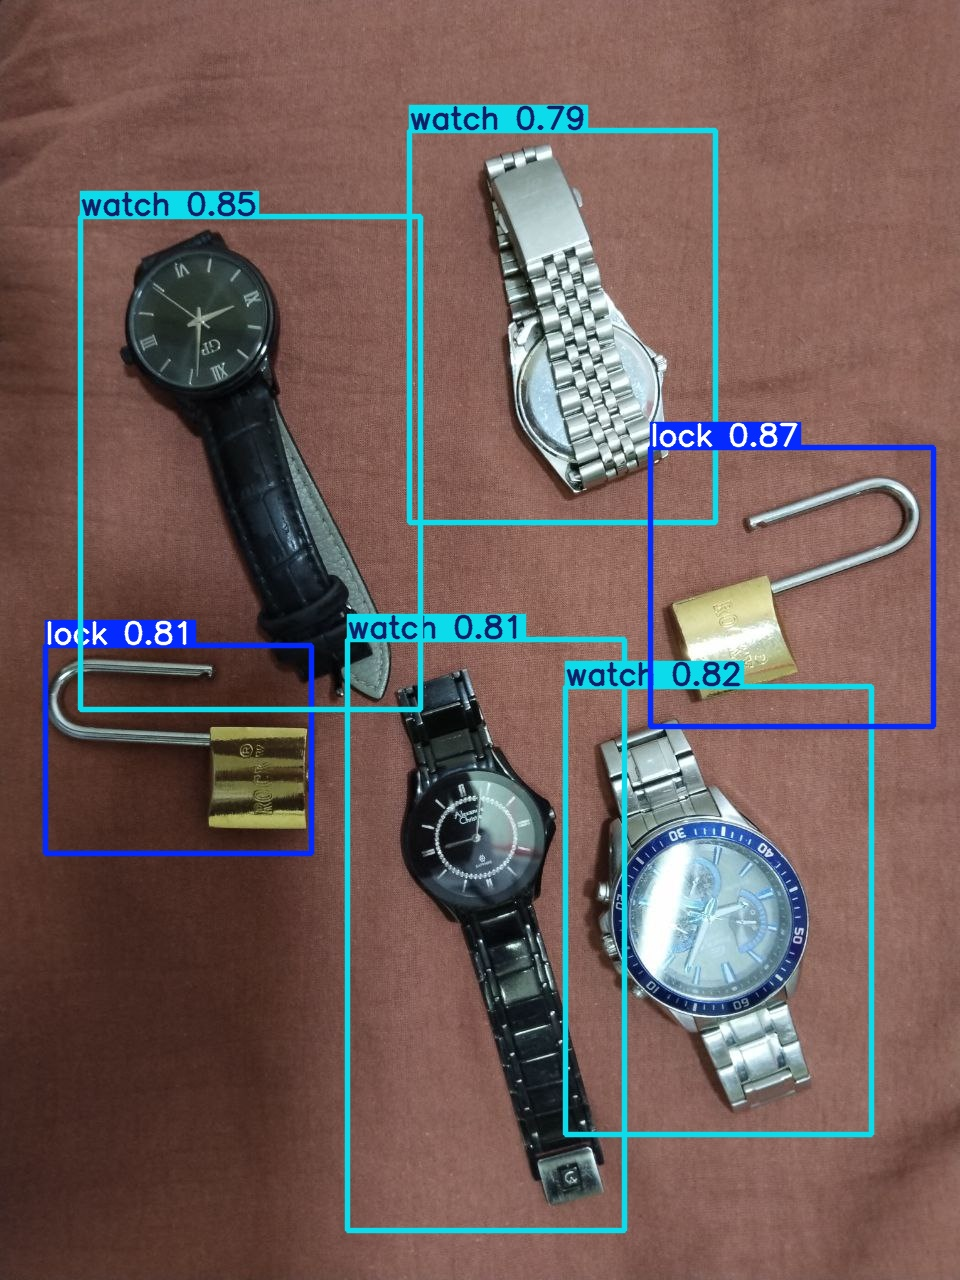

In [ ]:
import glob
from IPython.display import Image, display

for img_path in glob.glob('runs/detect/new_test/*.jpg'):
    display(Image(filename=img_path))


In [ ]:
# STEP 1: Display the training results plot (automatically generated by YOLOv5)
from IPython.display import Image, display

# This shows metrics like box loss, obj loss, precision, recall, mAP
display(Image(filename='runs/train/yolov5_custom/results.png'))


FileNotFoundError: [Errno 2] No such file or directory: 'runs/train/yolov5_custom/results.png'

In [ ]:
import pandas as pd

# Load CSV
csv_path = 'runs/train/yolov5_custom/results.csv'
df = pd.read_csv(csv_path)

# Display column names
print(df.columns)


Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')


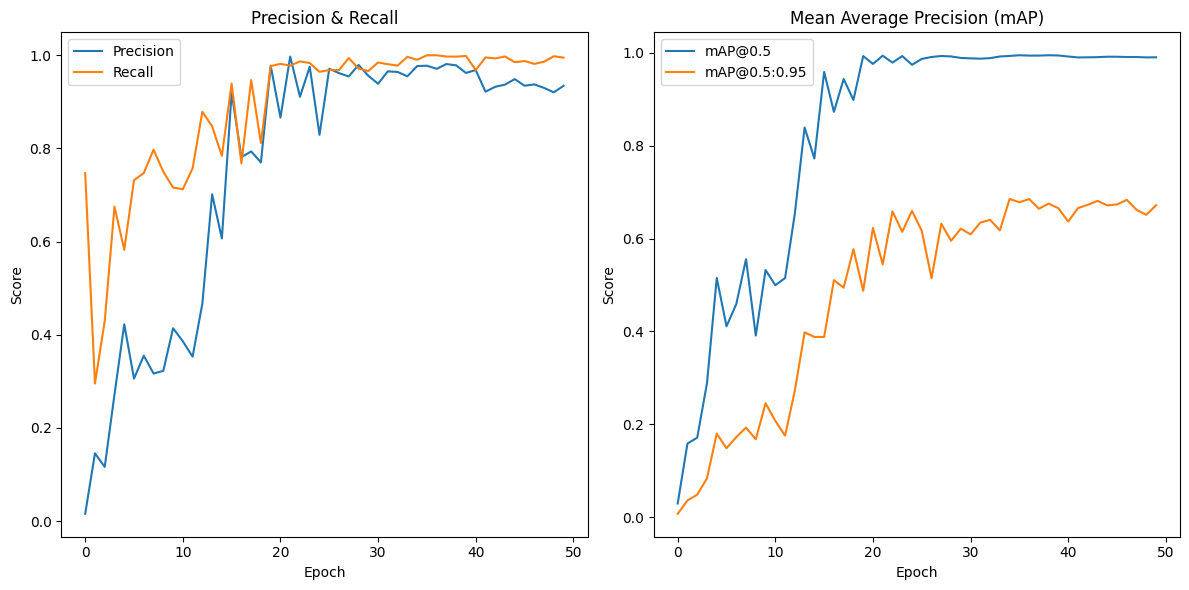

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV and clean column names
df = pd.read_csv('runs/train/yolov5_custom/results.csv')
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace

# Plot accuracy metrics
plt.figure(figsize=(12, 6))

# Plot precision and recall
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['metrics/precision'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision & Recall')
plt.legend()

# Plot mAP@0.5 and mAP@0.5:0.95
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Mean Average Precision (mAP)')
plt.legend()

plt.tight_layout()
plt.show()
